In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.24.3
pandas version :  2.0.3
seaborn version :  0.12.2


# Load Data

In [3]:
df = pd.read_csv('loan_data_2007_2014.csv')
df.head()

C:\Users\derma\AppData\Local\Temp\ipykernel_11344\1521905525.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan_data_2007_2014.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Descriptive Analytics

In [4]:
# Adding data descriptions
data_desc = pd.read_excel('LCDataDictionary.xlsx')
data_desc.dropna(inplace=True)
data_desc

,Unnamed: 0,Description,Unnamed: 2
0,_rec,The total amount committed by investors for th...,Jumlah total yang dilakukan oleh investor untu...
1,acc_now_delinq,The number of accounts on which the borrower i...,Jumlah akun di mana peminjam sekarang nakal.
2,addr_state,The state provided by the borrower in the loan...,Negara yang disediakan oleh peminjam dalam apl...
3,all_util,Balance to credit limit on all trades,Saldo ke batas kredit untuk semua perdagangan
4,annual_inc,The self-reported annual income provided by th...,v
...,...,...,...
73,total_rec_prncp,Principal received to date,Kepala sekolah diterima hingga saat ini
74,total_rev_hi_lim,Total revolving high credit/credit limit,Total Batas Kredit/Kredit Tinggi Revolving
75,url,URL for the LC page with listing data.,URL untuk halaman LC dengan data daftar.
76,verified_status_joint,Indicates if the co-borrowers' joint income wa...,Menunjukkan jika pendapatan bersama co-peminja...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [6]:
# Spliting data per category
nums = df.select_dtypes(exclude=object).columns.to_list()
cats = df.select_dtypes(include=object).columns.to_list()

In [7]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,466285.0,2.331420e+05,1.346050e+05,0.00,1.165710e+05,2.331420e+05,3.497130e+05,4.662840e+05
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01


Terdapat variable yang semua valuenya memiliki nilai NaN , yaitu 

'annual_inc_joint',               
'dti_joint',                      
'verification_status_joint',      
'open_acc_6m',                    
'open_il_6m',                     
'open_il_12m',                    
'open_il_24m',                    
'mths_since_rcnt_il',             
'total_bal_il',                   
'il_util',                        
'open_rv_12m',                    
'open_rv_24m',                    
'max_bal_bc',                     
'all_util',                       
'inq_fi',                         
'total_cu_tl',                    
'inq_last_12m',                   
 sehingga dapat dihapus

In [8]:
df[cats].describe().T

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276


In [9]:
df.duplicated().any()

False

Tidak terdapat data yang duplikat

## Target Variable

Karena project ini bertujuan untuk membuat modeling terhadap credit risk. Maka varibel yang akan digunakan adalah 'loan_status' yang memberikan deskripsi bagaimana status pembayaran kredit customer

In [10]:
df['loan_status'].value_counts()

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

Terdapat beberapa jenis status loan customer, karena tujuan dari pemodelan ini adalah untuk mengetahui credit risk, maka diperlukan pengelompokan mana saja status loan yang termasuk kategori good loan atau bad loan.

In [11]:
good = ['Current',
        'Fully Paid', 
        'In Grace Period', 
        'Does not meet the credit policy. Status:Fully Paid']

df_status = df.copy()
df_status['status_good/bad'] = np.where(df_status['loan_status'].isin(good),1,0)

In [12]:
df_status[['loan_status', 'status_good/bad']]

,loan_status,status_good/bad
0,Fully Paid,1
1,Charged Off,0
2,Fully Paid,1
3,Fully Paid,1
4,Current,1
...,...,...
466280,Current,1
466281,Charged Off,0
466282,Current,1
466283,Fully Paid,1


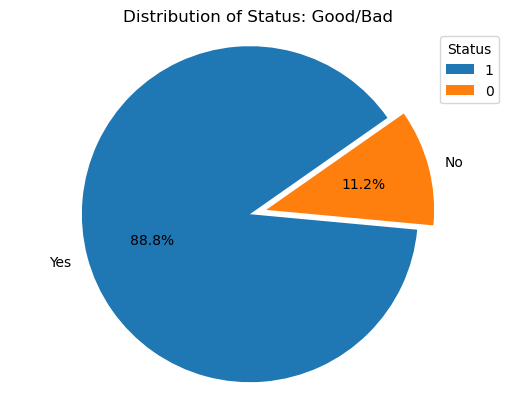

In [13]:
status_counts = df_status['status_good/bad'].value_counts()

plt.pie(status_counts, autopct='%1.1f%%', startangle=35, labels=["Yes","No"], explode=[0.1,0])
plt.axis('equal') 
plt.title('Distribution of Status: Good/Bad')
plt.legend(status_counts.index, title='Status', loc='upper right')

Berdasarkan hasil visualisasi diatas diketahui bahwa customer dengan loan status good berada dikategori mayoritas diangka 88.8%

In [14]:
#Menyimpan hasil segmentasi status loan ke dalam data utama
df['loan_status']=df_status['status_good/bad']

In [15]:
df['loan_status'].value_counts()

loan_status
1    414099
0     52186
Name: count, dtype: int64

# Exploratory Data Analysis

### Distribusi status peminjaman

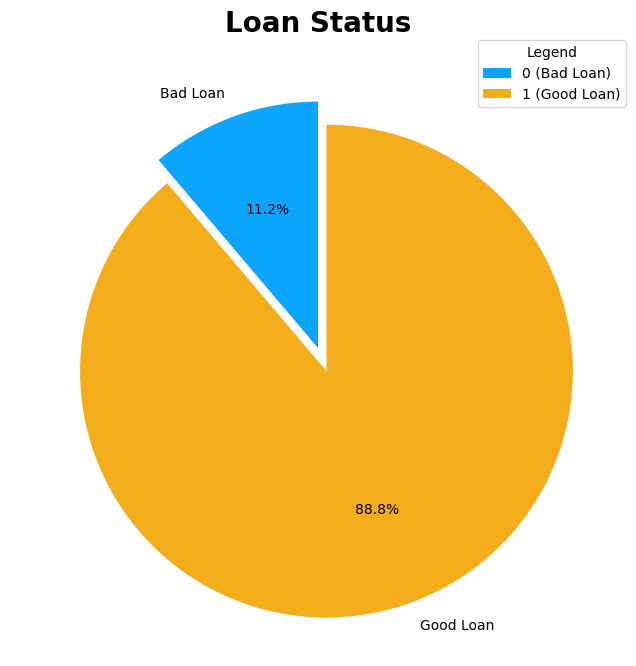

In [16]:
# Grupkan berdasarkan 'loan_status' dan hitung jumlah 'id'
df_type = df.groupby('loan_status')['id'].count().reset_index()
df_type = df_type.rename(columns={"id": "count_showids"})

# Plot pie chart menggunakan seaborn
plt.figure(figsize=(8, 8))
colors = ["#0ca5fc", "#f3ac1a"]
sns.set_palette(sns.color_palette(colors))
plt.pie(df_type['count_showids'], labels=['Bad Loan', 'Good Loan'], autopct='%1.1f%%', startangle=90, colors=colors, explode=(0, 0.1))
plt.title('Loan Status', fontdict={'fontsize': 20, 'fontweight': 'bold'})

# Tampilkan legenda
plt.legend(title='Legend', loc='upper right', bbox_to_anchor=(1, 1), borderaxespad=0., labels=['0 (Bad Loan)', '1 (Good Loan)'])

# Tampilkan plot
plt.show()

### Alasan Peminjaman

In [17]:
df_exp = df.copy()
df_exp[['Month','Year']] = df_exp['issue_d'].str.split('-',expand=True)
df_exp['Year'] = df_exp['Year'].replace(['07','08','09','10','11','12','13','14'],['2007','2008','2009','2010','2011','2012','2013','2014'])

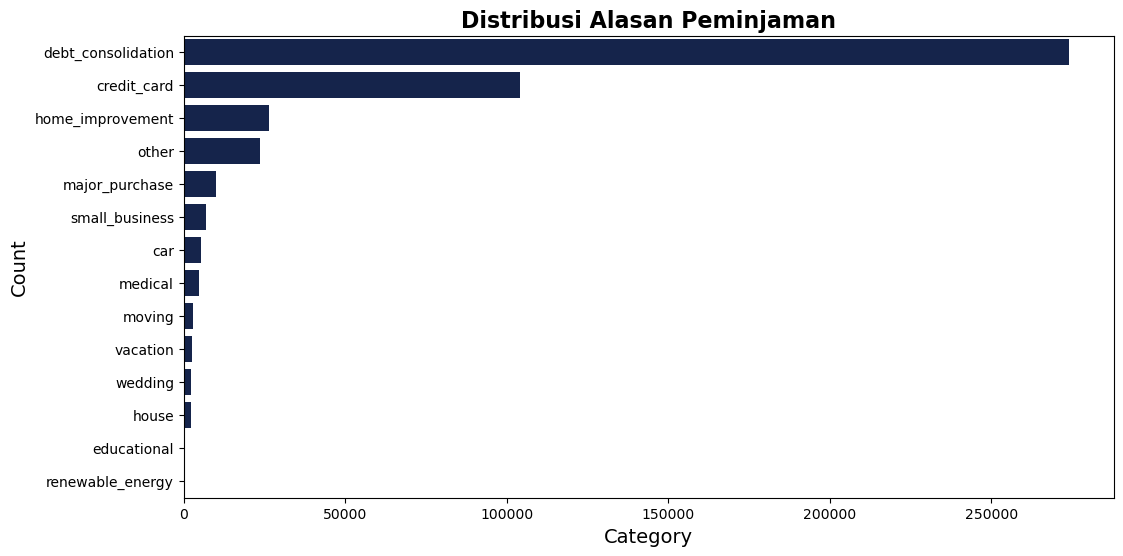

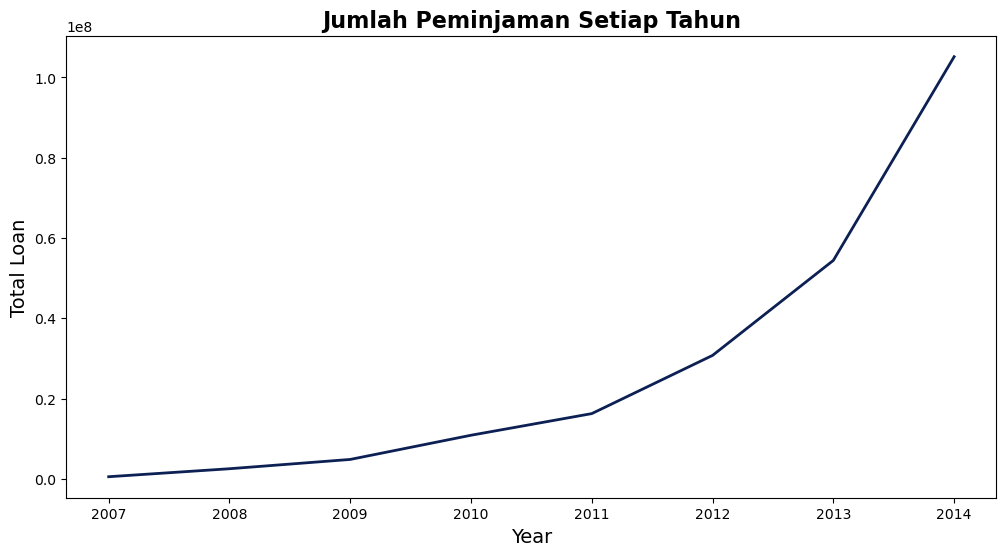

In [18]:
df_purpose = df_exp.groupby(['purpose', 'Year'])['loan_amnt'].sum().reset_index()

# Urutkan 'purpose' berdasarkan jumlah
df2 = df['purpose'].value_counts().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=df2, y=df2.index, color="#0c2054")
plt.title('Distribusi Alasan Peminjaman', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Tampilkan plot bar chart
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='loan_amnt', data=df_purpose[df_purpose['purpose'] == 'other'], color='#0c2054', linewidth=2)
plt.title('Jumlah Peminjaman Setiap Tahun', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Loan', fontsize=14)

# Tampilkan plot scatter plot
plt.show()

### Top 10 Negara yang paling aktif melakukan pinjaman

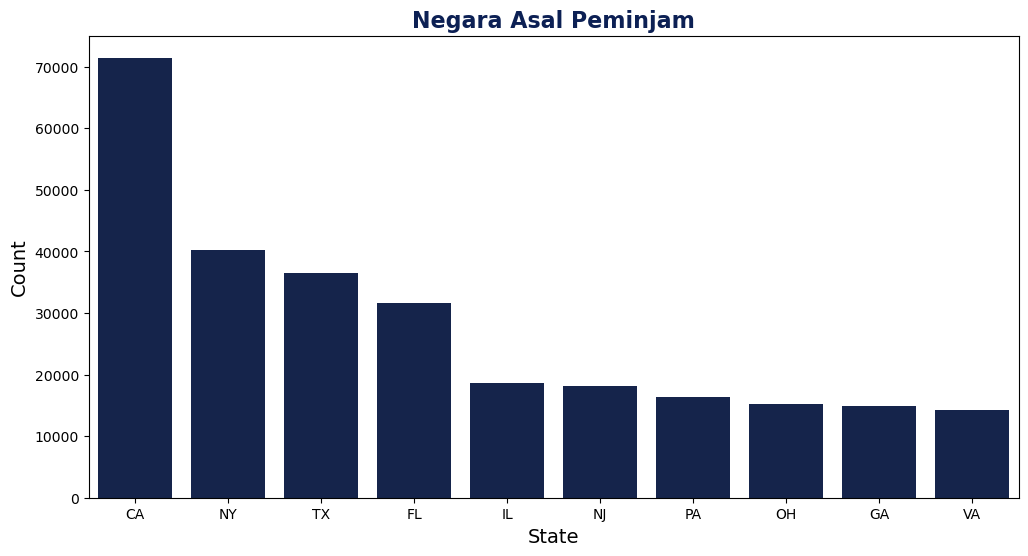

In [19]:
# Ambil 10 negara bagian teratas
df3 = df['addr_state'].value_counts().head(10)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=df3.index, y=df3, color="#0c2054")
plt.title("Negara Asal Peminjam", fontsize=16, fontweight='bold', color="#0c2054")
plt.xlabel('State', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Tampilkan plot bar chart
plt.show()

### Status Kepemilikan Rumah Customer yang Menggunakan Layanan injaman

In [20]:
df.home_ownership = df.home_ownership.replace(['ANY'],'OTHER')
df.home_ownership.value_counts()

home_ownership
MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          183
NONE            50
Name: count, dtype: int64

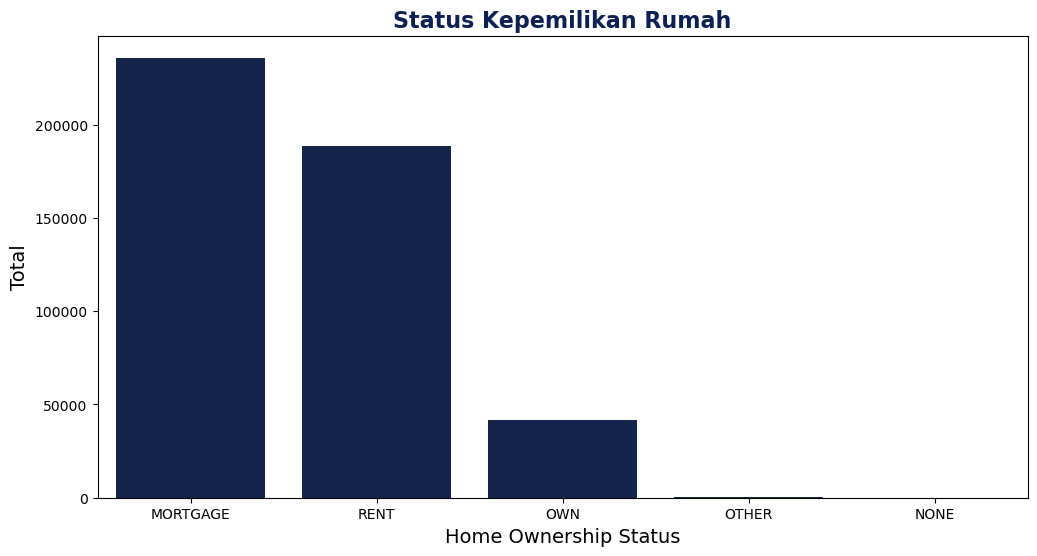

In [21]:
# Ambil 10 status kepemilikan rumah teratas
df3 = df['home_ownership'].value_counts().head(10)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=df3.index, y=df3, color="#0c2054")
plt.title('Status Kepemilikan Rumah', fontsize=16, fontweight='bold', color="#0c2054")
plt.xlabel('Home Ownership Status', fontsize=14)
plt.ylabel('Total', fontsize=14)

# Tampilkan plot bar chart
plt.show()

### Pekerjaan Peminjam yang Menggunakan Layanan Pinjaman

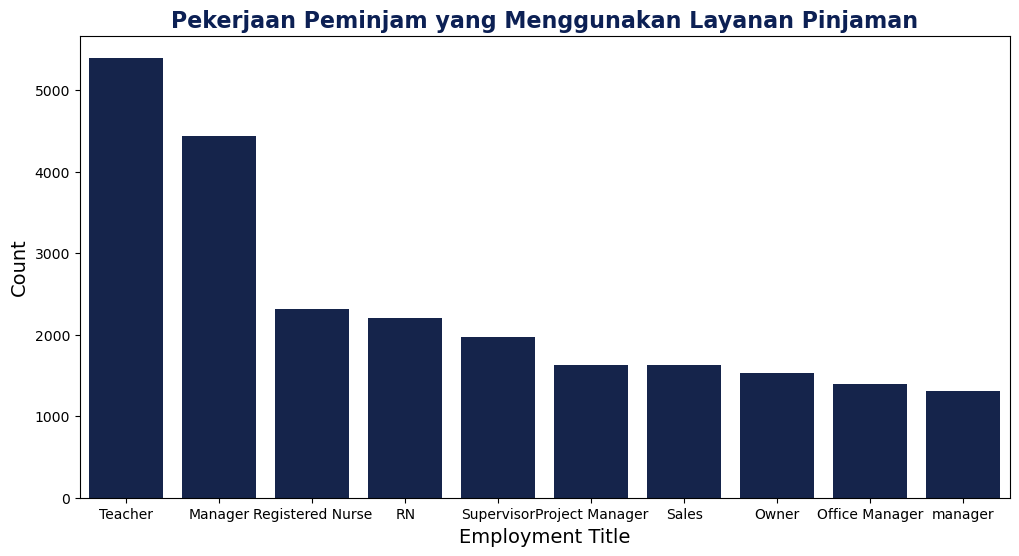

In [22]:
# Ambil 10 jabatan teratas
df3 = df['emp_title'].value_counts().head(10)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=df3.index, y=df3, color="#0c2054")
plt.title("Pekerjaan Peminjam yang Menggunakan Layanan Pinjaman", fontsize=16, fontweight='bold', color="#0c2054")
plt.xlabel('Employment Title', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Tampilkan plot bar chart
plt.show()

### Distribusi Grade Pinjaman Peminjam

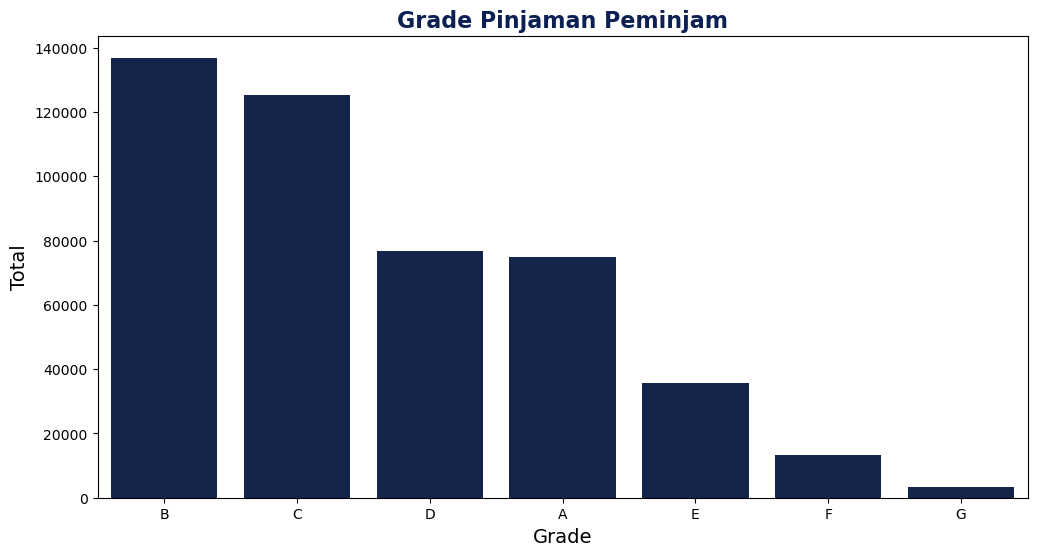

In [23]:
# Ambil 10 nilai teratas pada kolom 'grade'
df3 = df['grade'].value_counts().head(10)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=df3.index, y=df3, color="#0c2054")
plt.title('Grade Pinjaman Peminjam', fontsize=16, fontweight='bold', color="#0c2054")
plt.xlabel('Grade', fontsize=14)
plt.ylabel('Total', fontsize=14)

# Tampilkan plot bar chart
plt.show()

# Data Cleaning

In [24]:
df_clean = df.copy()

### Drop Unuseable Column

In [25]:
# For Categorical Data
cats_unuseable = ['member_id','id','emp_title','url','desc','title','zip_code','policy_code','application_type']

print('shape before drop = ',df.shape)

df_clean = df.drop(columns=cats_unuseable, axis=1)
df_clean.drop_duplicates(inplace=True)

print('shape after drop = ',df_clean.shape)

shape before drop =  (466285, 75)
shape after drop =  (466285, 66)


In [26]:
# For Numerical Data

nums_unuseable = ['annual_inc_joint','dti_joint','verification_status_joint','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il',
'mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','inq_fi','inq_last_12m','total_cu_tl','Unnamed: 0']

print('shape before drop = ',df_clean.shape)

df_clean = df_clean.drop(columns=nums_unuseable, axis=1)

print('shape after drop = ',df_clean.shape)

shape before drop =  (466285, 66)
shape after drop =  (466285, 48)


### Handling Missing Values

In [27]:
for i in df_clean.columns:
    print(f'{i} has missing values about {round(df_clean[i].isna().mean()*100,2)}%')

loan_amnt has missing values about 0.0%
funded_amnt has missing values about 0.0%
funded_amnt_inv has missing values about 0.0%
term has missing values about 0.0%
int_rate has missing values about 0.0%
installment has missing values about 0.0%
grade has missing values about 0.0%
sub_grade has missing values about 0.0%
emp_length has missing values about 4.51%
home_ownership has missing values about 0.0%
annual_inc has missing values about 0.0%
verification_status has missing values about 0.0%
issue_d has missing values about 0.0%
loan_status has missing values about 0.0%
pymnt_plan has missing values about 0.0%
purpose has missing values about 0.0%
addr_state has missing values about 0.0%
dti has missing values about 0.0%
delinq_2yrs has missing values about 0.01%
earliest_cr_line has missing values about 0.01%
inq_last_6mths has missing values about 0.01%
mths_since_last_delinq has missing values about 53.69%
mths_since_last_record has missing values about 86.57%
open_acc has missing 

In [28]:
#Variable that is having more than 50% missing values
df_clean.columns[df_clean.isna().mean()>0.5]

Index(['mths_since_last_delinq', 'mths_since_last_record',
       'mths_since_last_major_derog'],
      dtype='object')

In [29]:
# Drop Variable that is having more than 70% missing values
print('shape before drop = ',df_clean.shape)
df_clean = df_clean.drop(df_clean.columns[df_clean.isna().mean()>0.5], axis = 1)
print('shape after drop = ',df_clean.shape)

shape before drop =  (466285, 48)
shape after drop =  (466285, 45)


In [30]:
#Search for the remaining variables that have missing values
null_var = []
null_var_dtypes = {}
for i in df_clean.columns:
    if df_clean[i].isna().any() == True:
        null_var.append(i)
        null_var_dtypes[i] = df_clean[i].dtype
null = pd.DataFrame({
    'Column Name': null_var,
    'Data Type': [null_var_dtypes[column] for column in null_var]})
null

,Column Name,Data Type
0,emp_length,object
1,annual_inc,float64
2,delinq_2yrs,float64
3,earliest_cr_line,object
4,inq_last_6mths,float64
5,open_acc,float64
6,pub_rec,float64
7,revol_util,float64
8,total_acc,float64
9,last_pymnt_d,object


In [31]:
#fill null for categorical variables
for i in df_clean.select_dtypes(include=object).columns.tolist():
    if i in null_var:
        df_clean[i] = df_clean[i].fillna(df_clean[i].mode().iloc[0])

#fill null for numerical variables
for i in df_clean.select_dtypes(exclude=object).columns.tolist():
    if i in null_var:
        df_clean[i] = df_clean[i].fillna(df_clean[i].median())

In [32]:
for i in df_clean.columns:
    print(f'After handling missing value, varible {i} has missing values about {round(df_clean[i].isna().mean()*100,2)}%')

After handling missing value, varible loan_amnt has missing values about 0.0%
After handling missing value, varible funded_amnt has missing values about 0.0%
After handling missing value, varible funded_amnt_inv has missing values about 0.0%
After handling missing value, varible term has missing values about 0.0%
After handling missing value, varible int_rate has missing values about 0.0%
After handling missing value, varible installment has missing values about 0.0%
After handling missing value, varible grade has missing values about 0.0%
After handling missing value, varible sub_grade has missing values about 0.0%
After handling missing value, varible emp_length has missing values about 0.0%
After handling missing value, varible home_ownership has missing values about 0.0%
After handling missing value, varible annual_inc has missing values about 0.0%
After handling missing value, varible verification_status has missing values about 0.0%
After handling missing value, varible issue_d h

### Checking Unique Values

In [33]:
print("Unique Features (Numerical)")
print(df_clean.select_dtypes(exclude='object').nunique())

Unique Features (Numerical)
loan_amnt                       1352
funded_amnt                     1354
funded_amnt_inv                 9854
int_rate                         506
installment                    55622
annual_inc                     31901
loan_status                        2
dti                             3997
delinq_2yrs                       24
inq_last_6mths                    28
open_acc                          62
pub_rec                           26
revol_bal                      58142
revol_util                      1269
total_acc                        112
out_prncp                     135665
out_prncp_inv                 141189
total_pymnt                   351609
total_pymnt_inv               347659
total_rec_prncp               172713
total_rec_int                 270249
total_rec_late_fee              5808
recoveries                     22773
collection_recovery_fee        20275
last_pymnt_amnt               198194
collections_12_mths_ex_med         9
acc_now_de

In [34]:
print("Unique Features (Categorical)")
print(df_clean.select_dtypes(exclude=['int','float']).nunique())

Unique Features (Categorical)
term                     2
grade                    7
sub_grade               35
emp_length              11
home_ownership           5
verification_status      3
issue_d                 91
pymnt_plan               2
purpose                 14
addr_state              50
earliest_cr_line       664
initial_list_status      2
last_pymnt_d            98
next_pymnt_d           100
last_credit_pull_d     103
dtype: int64


- earliest_cr_line has more than 500 unique values
- last_credit_pull_d,issue_d,addr_state, last_pymnt_d, next_pymnt_d have at least 50 unique values (below 500)

In [35]:
df_clean["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

thers's a white space before the words so we need to clean the whitespace

In [36]:
df_clean['term'] = df_clean['term'].apply(lambda x: x.strip())

In [37]:
df_clean['term'].unique()

array(['36 months', '60 months'], dtype=object)

# Data Pre Processing

In [38]:
df_pre = df_clean.copy()

# Feature Engineering

In [39]:
# X_selected.columns

### Feature Encoding

In [40]:
df_pre["term"].unique()

array(['36 months', '60 months'], dtype=object)

In [41]:
def text_num(text):
  return [int(s) for s in text.split() if s.isdigit()][0]

In [42]:
df_pre["term"] = df_pre["term"].apply(lambda x: text_num(x))

In [43]:
df_pre.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,...,0.00,Jan-15,171.62,Feb-16,Jan-16,0.0,0.0,0.0,81539.0,22800.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,...,1.11,Apr-13,119.66,Feb-16,Sep-13,0.0,0.0,0.0,81539.0,22800.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,...,0.00,Jun-14,649.91,Feb-16,Jan-16,0.0,0.0,0.0,81539.0,22800.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,...,0.00,Jan-15,357.48,Feb-16,Jan-15,0.0,0.0,0.0,81539.0,22800.0
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,...,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,0.0,0.0,81539.0,22800.0


In [44]:
df_pre['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [45]:
df_pre['emp_length'] = df_pre['emp_length'].map({'< 1 year':0,
                                             '1 year':1,
                                             '2 years':2,
                                             '3 years':3,
                                             '4 years':4,
                                             '5 years':5,
                                             '6 years':6,
                                             '7 years':7,
                                             '8 years':8,
                                             '9 years':8,
                                             '10+ years':9})

In [46]:
df_pre["grade"].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [47]:
target_dict = {'A':6,
               'B':5,
               'C':4,
               'D':3,
               'E':2,
               'F':1,
               'G':0}
df_pre["grade"] = df_pre["grade"].map(target_dict)

In [48]:
df_pre["grade"].unique()

array([5, 4, 6, 2, 1, 3, 0], dtype=int64)

In [49]:
df_pre["sub_grade"].unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

In [50]:
def f_A(row):
    if row == 'A1':
        val = 1
    elif row == 'A2':
        val = 2
    elif row == 'A3':
        val = 3
    elif row == 'A4':
        val = 4
    elif row == 'A5':
        val = 5
    else:
        val = 0
    return val

def f_B(row):
    if row == 'B1':
        val = 1
    elif row == 'B2':
        val = 2
    elif row == 'B3':
        val = 3
    elif row == 'B4':
        val = 4
    elif row == 'B5':
        val = 5
    else:
        val = 0
    return val

def f_C(row):
    if row == 'C1':
        val = 1
    elif row == 'C2':
        val = 2
    elif row == 'C3':
        val = 3
    elif row == 'C4':
        val = 4
    elif row == 'C5':
        val = 5
    else:
        val = 0
    return val

def f_D(row):
    if row == 'D1':
        val = 1
    elif row == 'D2':
        val = 2
    elif row == 'D3':
        val = 3
    elif row == 'D4':
        val = 4
    elif row == 'D5':
        val = 5
    else:
        val = 0
    return val

def f_E(row):
    if row == 'E1':
        val = 1
    elif row == 'E2':
        val = 2
    elif row == 'E3':
        val = 3
    elif row == 'E4':
        val = 4
    elif row == 'E5':
        val = 5
    else:
        val = 0
    return val

def f_F(row):
    if row == 'F1':
        val = 1
    elif row == 'F2':
        val = 2
    elif row == 'F3':
        val = 3
    elif row == 'F4':
        val = 4
    elif row == 'F5':
        val = 5
    else:
        val = 0
    return val

def f_G(row):
    if row == 'G1':
        val = 1
    elif row == 'G2':
        val = 2
    elif row == 'G3':
        val = 3
    elif row == 'G4':
        val = 4
    elif row == 'G5':
        val = 5
    else:
        val = 0
    return val

In [51]:
df_pre['SubGrade_A'] = df_pre["sub_grade"].apply(f_A)
df_pre['SubGrade_B'] = df_pre["sub_grade"].apply(f_B)
df_pre['SubGrade_C'] = df_pre["sub_grade"].apply(f_C)
df_pre['SubGrade_D'] = df_pre["sub_grade"].apply(f_D)
df_pre['SubGrade_E'] = df_pre["sub_grade"].apply(f_E)
df_pre['SubGrade_F'] = df_pre["sub_grade"].apply(f_F)
df_pre['SubGrade_G'] = df_pre["sub_grade"].apply(f_G)
df_pre = df_pre.drop(axis=1, columns="sub_grade")

In [52]:
df_pre.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'SubGrade_A', 'SubGrade_B',
       'SubGrade_C', 'SubGrade_D', 'SubGrade_E', 'SubGrade_F', 'SubGrade_G'],
      dtype='object')

In [53]:
df_pre["home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

- value 'OTHER', 'NONE', 'ANY' will be aggregated as other


In [54]:
df_pre["home_ownership"] = df_pre["home_ownership"].map({'MORTGAGE':'MORTGAGE',
                                                            'RENT':'RENT',
                                                            'OWN':'OWN',
                                                            'OTHER':'OTHER',
                                                            'ANY':'OTHER',
                                                            'NONE':'OTHER'})

In [55]:
df_pre["home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [56]:
from sklearn.preprocessing import OneHotEncoder

In [57]:
encoder = OneHotEncoder(sparse=False)
onehots = pd.DataFrame(encoder.fit_transform(df_pre[['home_ownership']]), columns=encoder.get_feature_names_out(['home_ownership']))
df_pre = df_pre.join(onehots)
df_pre.drop(["home_ownership"] ,axis=1, inplace=True)

c:\Users\derma\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [58]:
df_pre.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,annual_inc,verification_status,...,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,5000,5000,4975.0,36,10.65,162.87,5,9,24000.0,Verified,...,2,0,0,0,0,0,0.0,0.0,0.0,1.0
1,2500,2500,2500.0,60,15.27,59.83,4,0,30000.0,Source Verified,...,0,4,0,0,0,0,0.0,0.0,0.0,1.0
2,2400,2400,2400.0,36,15.96,84.33,4,9,12252.0,Not Verified,...,0,5,0,0,0,0,0.0,0.0,0.0,1.0
3,10000,10000,10000.0,36,13.49,339.31,4,9,49200.0,Source Verified,...,0,1,0,0,0,0,0.0,0.0,0.0,1.0
4,3000,3000,3000.0,60,12.69,67.79,5,1,80000.0,Source Verified,...,5,0,0,0,0,0,0.0,0.0,0.0,1.0


In [59]:
df_pre["verification_status"].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [60]:
encoder = OneHotEncoder(sparse=False)
onehots = pd.DataFrame(encoder.fit_transform(df_pre[['verification_status']]), columns=encoder.get_feature_names_out(['verification_status']))
df_pre = df_pre.join(onehots)
df_pre.drop(["verification_status"] ,axis=1, inplace=True)

c:\Users\derma\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [61]:
df_pre.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,annual_inc,issue_d,...,SubGrade_E,SubGrade_F,SubGrade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,5000,5000,4975.0,36,10.65,162.87,5,9,24000.0,Dec-11,...,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2500,2500,2500.0,60,15.27,59.83,4,0,30000.0,Dec-11,...,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2400,2400,2400.0,36,15.96,84.33,4,9,12252.0,Dec-11,...,0,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,10000,10000,10000.0,36,13.49,339.31,4,9,49200.0,Dec-11,...,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,3000,3000,3000.0,60,12.69,67.79,5,1,80000.0,Dec-11,...,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [62]:
df_pre['pymnt_plan'].unique()

array(['n', 'y'], dtype=object)

In [63]:
df_pre["pymnt_plan"] = df_pre["pymnt_plan"].map({'n':0,
                                                'y':1})

In [64]:
df_pre.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,annual_inc,issue_d,...,SubGrade_E,SubGrade_F,SubGrade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,5000,5000,4975.0,36,10.65,162.87,5,9,24000.0,Dec-11,...,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2500,2500,2500.0,60,15.27,59.83,4,0,30000.0,Dec-11,...,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2400,2400,2400.0,36,15.96,84.33,4,9,12252.0,Dec-11,...,0,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,10000,10000,10000.0,36,13.49,339.31,4,9,49200.0,Dec-11,...,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,3000,3000,3000.0,60,12.69,67.79,5,1,80000.0,Dec-11,...,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [65]:
df_pre.select_dtypes(include=object).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   issue_d              466285 non-null  object
 1   purpose              466285 non-null  object
 2   addr_state           466285 non-null  object
 3   earliest_cr_line     466285 non-null  object
 4   initial_list_status  466285 non-null  object
 5   last_pymnt_d         466285 non-null  object
 6   next_pymnt_d         466285 non-null  object
 7   last_credit_pull_d   466285 non-null  object
dtypes: object(8)
memory usage: 28.5+ MB


In [66]:
df_pre['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

* home_improvement, car, medical, wedding, moving, house, vacation, educational can be aggregated into private_use
* renewable_energy can be aggregated into other 

In [67]:
df_pre["purpose"] = df_pre["purpose"].map({ 'debt_consolidation':'debt_consolidation',
                                            'credit_card':'credit_card',
                                            'home_improvement':'private_use',
                                            'other':'other',
                                            'major_purchase':'major_purchase',
                                            'small_business':'small_business',
                                            'car':'private_use',
                                            'medical':'private_use',
                                            'wedding':'private_use',
                                            'moving':'private_use',
                                            'house':'private_use',
                                            'vacation':'private_use',
                                            'educational':'private_use',
                                            'renewable_energy':'other'})

In [68]:
df_pre["purpose"].value_counts()

purpose
debt_consolidation    274195
credit_card           104157
private_use            47051
other                  24041
major_purchase          9828
small_business          7013
Name: count, dtype: int64

In [69]:
encoder = OneHotEncoder(sparse=False)
onehots = pd.DataFrame(encoder.fit_transform(df_pre[['purpose']]), columns=encoder.get_feature_names_out(['purpose']))
df_pre = df_pre.join(onehots)
df_pre.drop(["purpose"] ,axis=1, inplace=True)

c:\Users\derma\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [70]:
df_pre.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,annual_inc,issue_d,...,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_major_purchase,purpose_other,purpose_private_use,purpose_small_business
0,5000,5000,4975.0,36,10.65,162.87,5,9,24000.0,Dec-11,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2500,2500,2500.0,60,15.27,59.83,4,0,30000.0,Dec-11,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2400,2400,2400.0,36,15.96,84.33,4,9,12252.0,Dec-11,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,10000,10000,10000.0,36,13.49,339.31,4,9,49200.0,Dec-11,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,3000,3000,3000.0,60,12.69,67.79,5,1,80000.0,Dec-11,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [71]:
df_pre["initial_list_status"].unique()

array(['f', 'w'], dtype=object)

In [72]:
encoder = OneHotEncoder(sparse=False)
onehots = pd.DataFrame(encoder.fit_transform(df_pre[['initial_list_status']]), columns=encoder.get_feature_names_out(['initial_list_status']))
df_pre = df_pre.join(onehots)
df_pre.drop(["initial_list_status"] ,axis=1, inplace=True)

c:\Users\derma\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Handling Outliers

In [73]:
df_pre.select_dtypes(exclude=object).columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'annual_inc', 'loan_status',
       'pymnt_plan', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'SubGrade_A', 'SubGrade_B',
       'SubGrade_C', 'SubGrade_D', 'SubGrade_E', 'SubGrade_F', 'SubGrade_G',
       'home_ownership_MORTGAGE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_

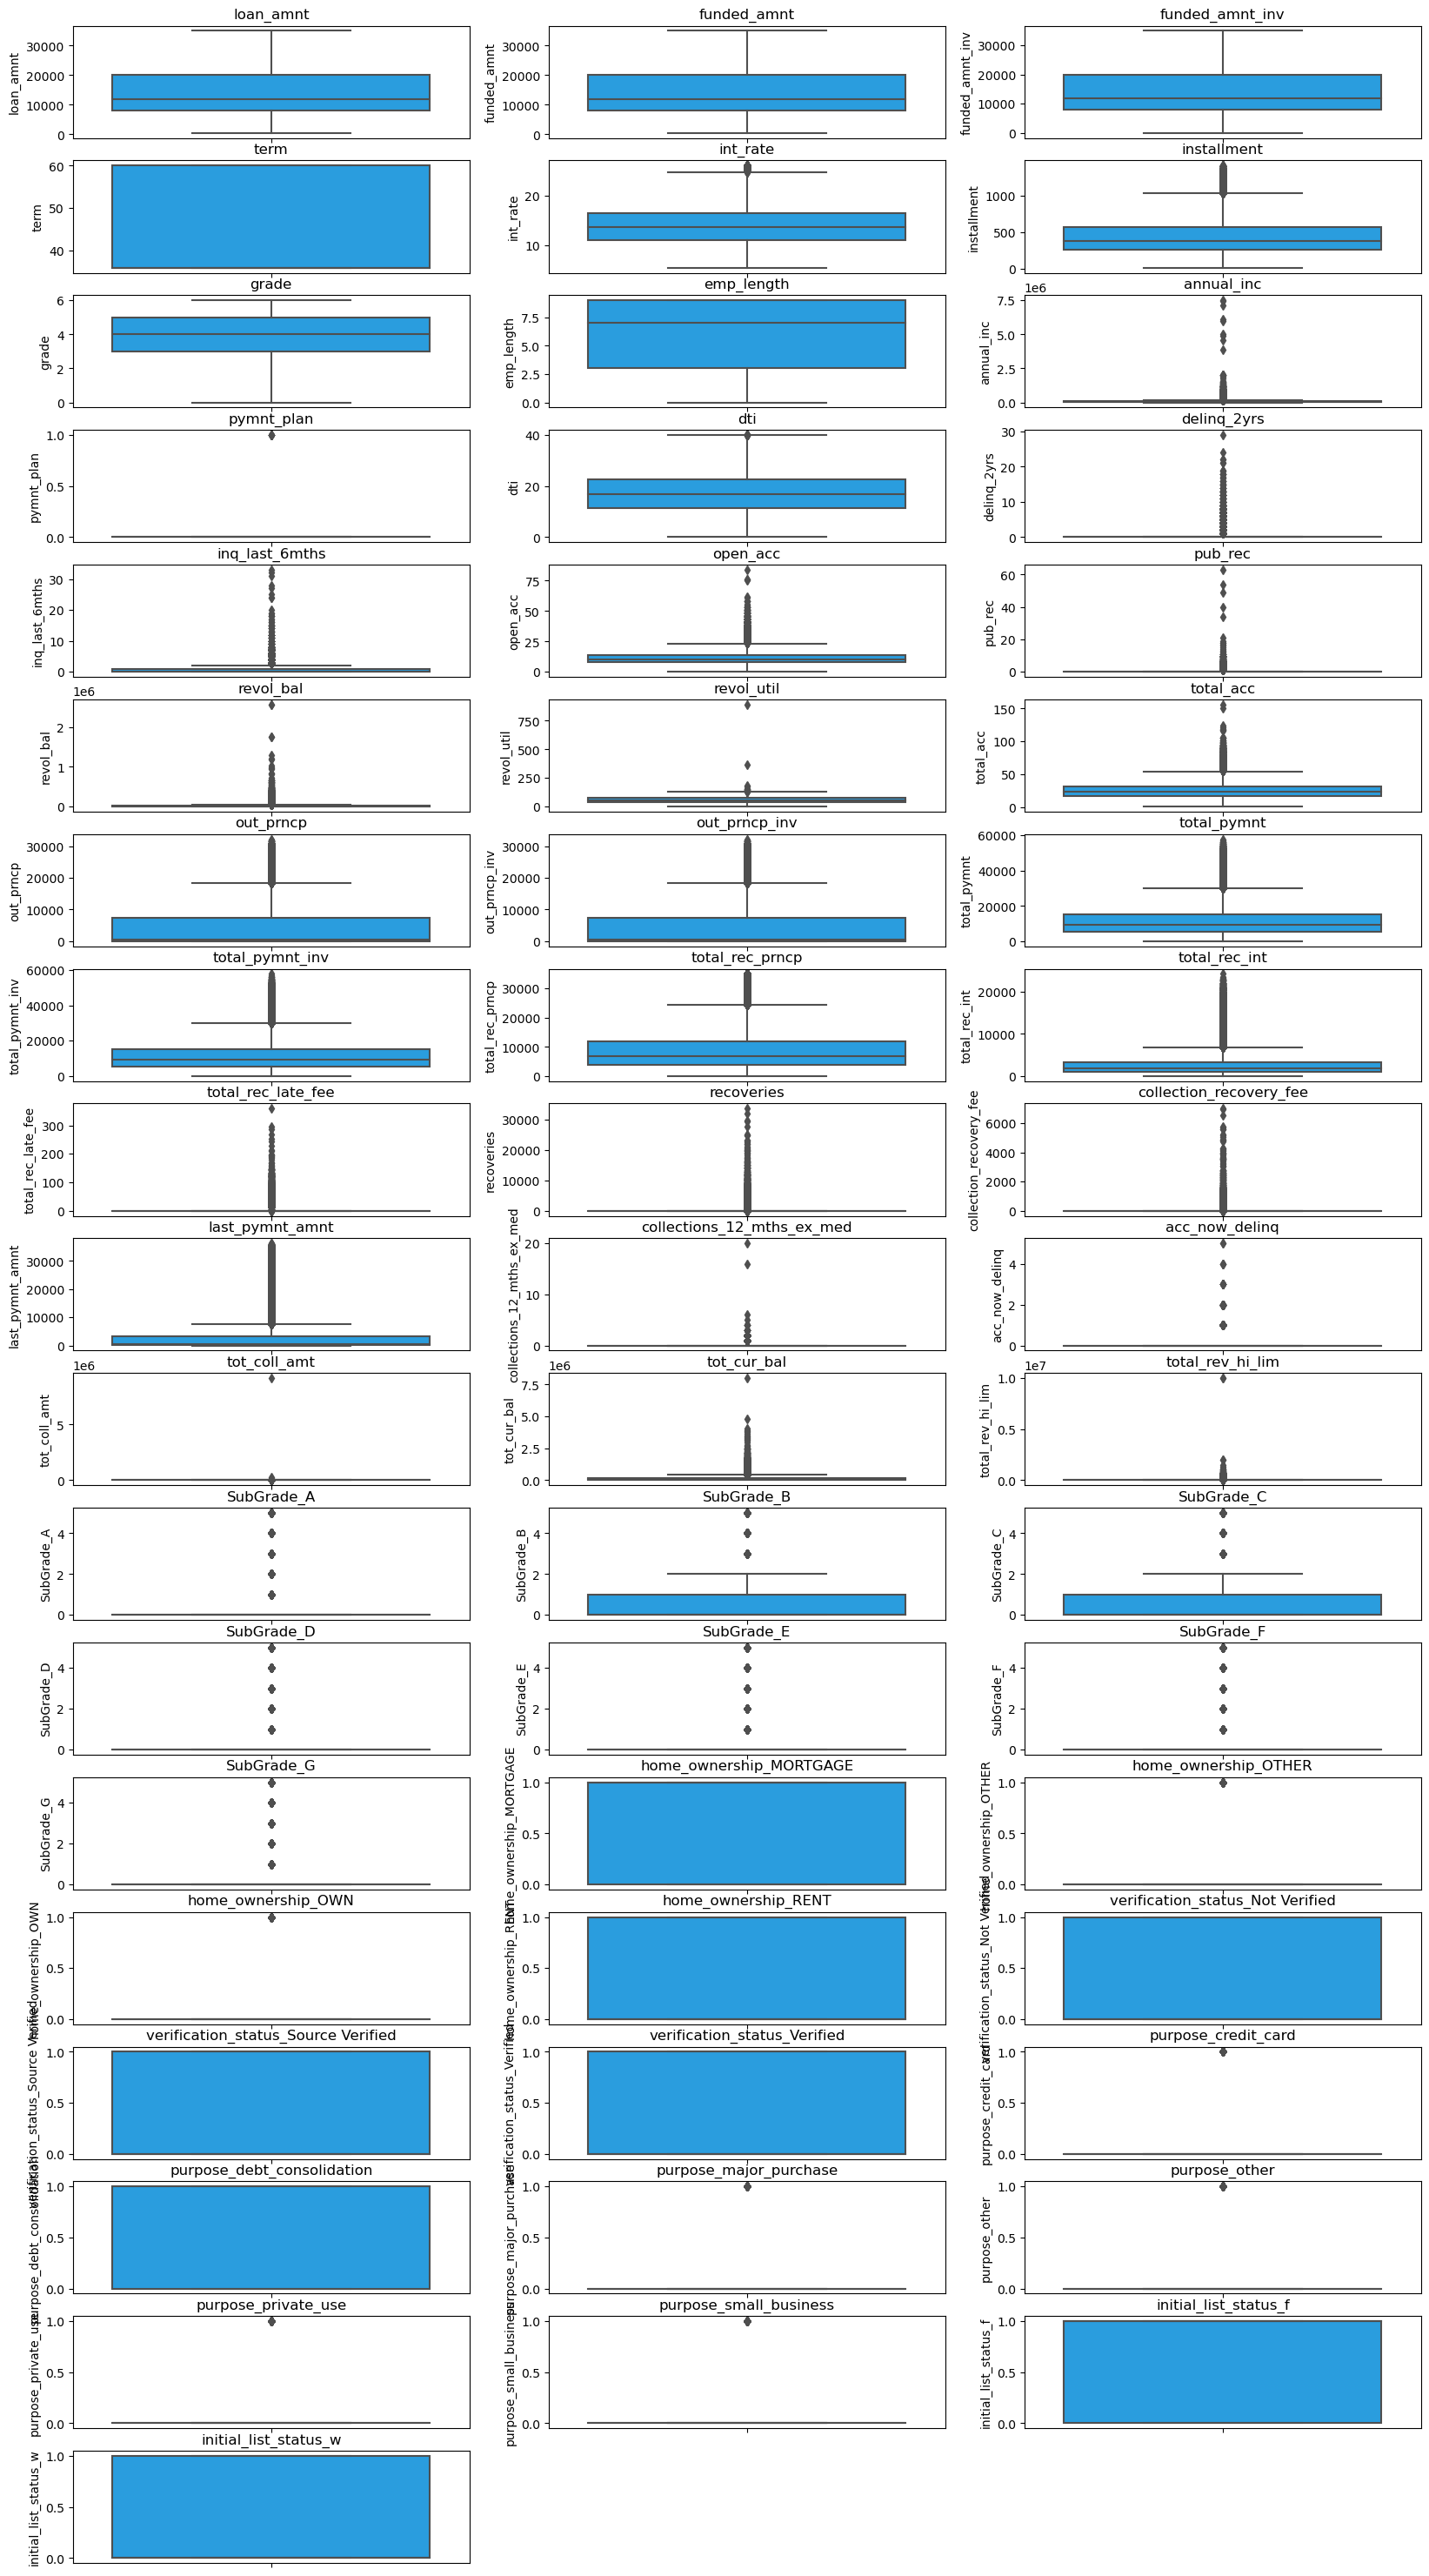

In [74]:
features = df_pre.drop(columns='loan_status').select_dtypes(exclude=object).columns
plt.figure(figsize=(20, 60))
for i in range(len(features)):
    plt.subplot(30,3,i+1)
    sns.boxplot(y=df_pre[features[i]])
    plt.title(features[i])

As we can see in the visualization above, the features that have outliers are:
'installment','annual_inc','open_acc','total_rec_late_fee','last_pymnt_amnt','total_rev_hi_lim', 'tot_coll_amt','collection_recovery_fee','tot_cur_bal'

 and we will handle this outliers by using IQR

In [75]:
outlier = ['installment','annual_inc','open_acc','total_rec_late_fee','last_pymnt_amnt','total_rev_hi_lim',
           'tot_coll_amt','collection_recovery_fee','tot_cur_bal']

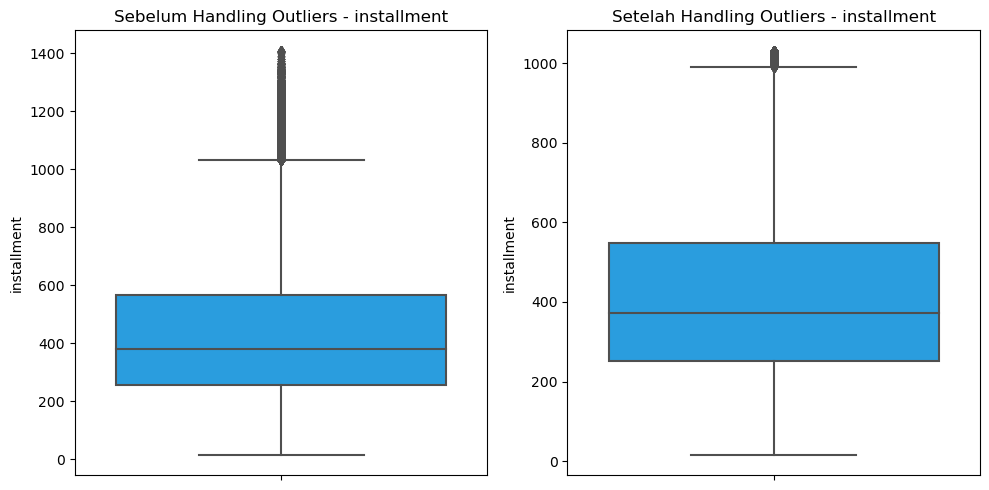

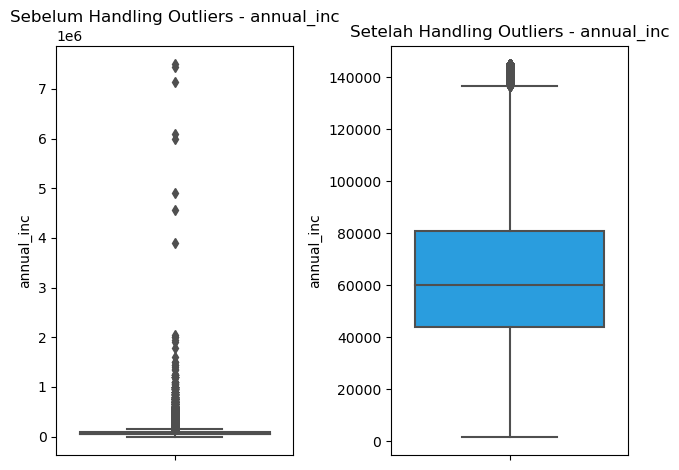

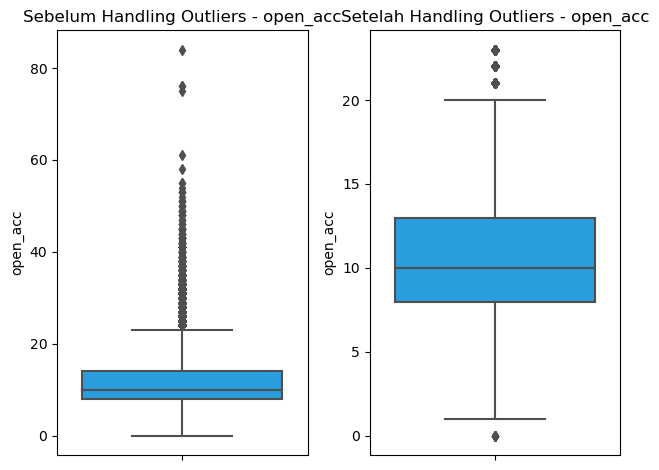

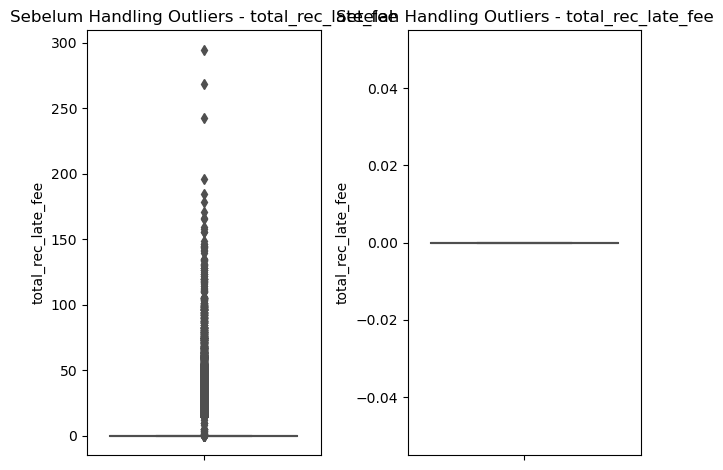

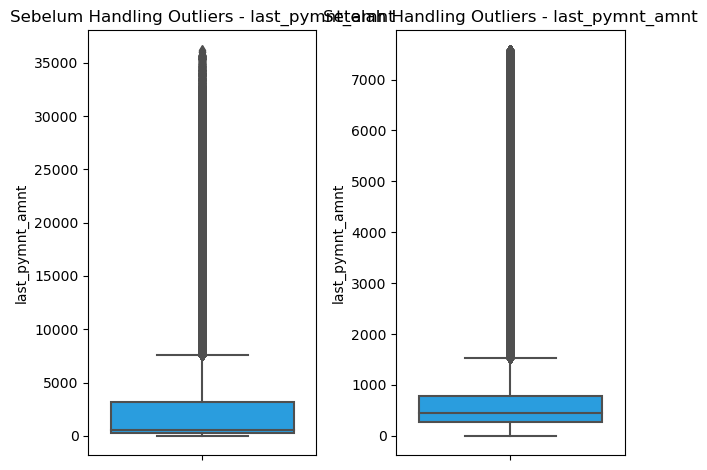

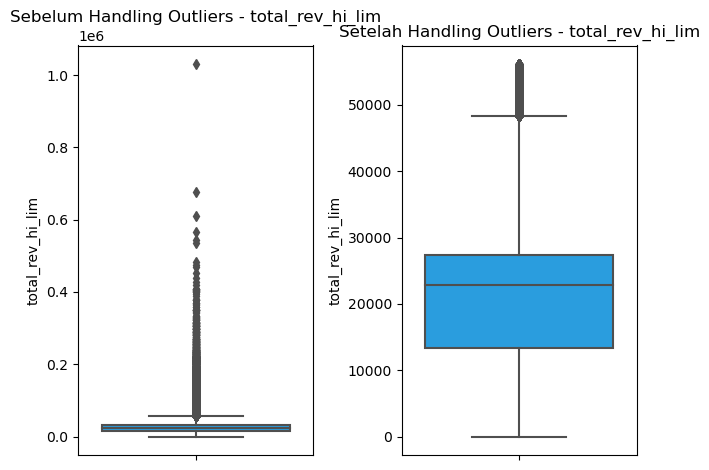

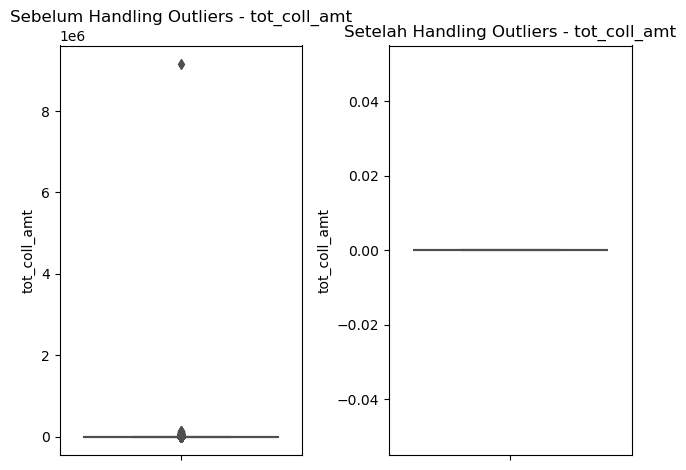

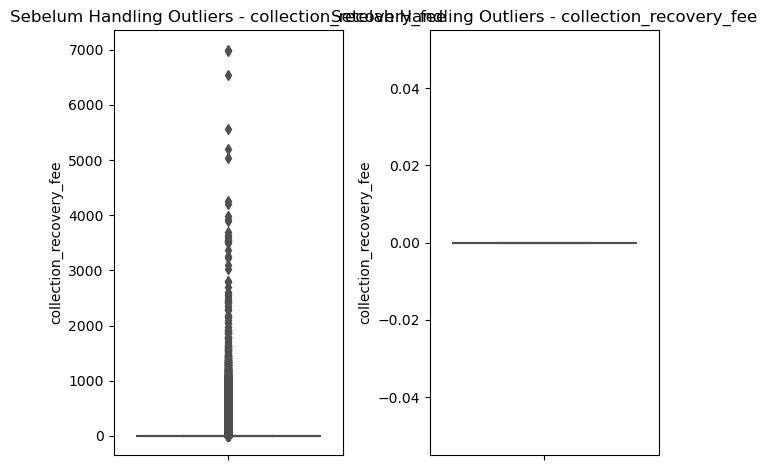

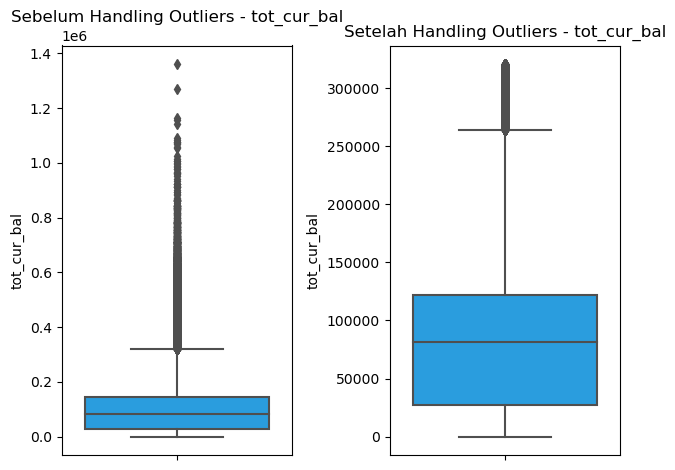

In [76]:
plt.figure(figsize=(10, 5))
for col in outlier:
    # Boxplot sebelum penanganan outliers
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df_pre[col])
    plt.title(f'Sebelum Handling Outliers - {col}')

    Q1 = df_pre[col].quantile(0.25)
    Q3 = df_pre[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (1.5 * IQR)
    high_limit = Q3 + (1.5 * IQR)
    filtered_entries = ((df_pre[col] >= low_limit) & (df_pre[col] <= high_limit))
    df_pre = df_pre[filtered_entries]

# Boxplot setelah penanganan outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_pre[col])
    plt.title(f'Setelah Handling Outliers - {col}')

    plt.tight_layout()
    plt.show()

In [77]:
print(df_pre.shape)

(261530, 62)


### Data Splitting

In [78]:
from sklearn.preprocessing import MinMaxScaler

In [79]:
X = df_pre.select_dtypes(exclude=object).drop(columns='loan_status') # menggunakan semua feature kecuali target
y = df_pre['loan_status']

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42) #Splitting 

In [81]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(183071, 55) (78459, 55) (183071,) (78459,)


## Handling Imbalanced Class

In [82]:
from imblearn.over_sampling import SMOTE

In [83]:
sm = SMOTE(random_state = 42)
X_train, y_train= sm.fit_resample(X_train, y_train)

In [84]:
y_train.value_counts()

loan_status
1    169298
0    169298
Name: count, dtype: int64

# Modeling

In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import StackingClassifier
from imblearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import cross_val_score


In [86]:
from sklearn.metrics import confusion_matrix
def plotting_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(1, 1, figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Greens', annot_kws={"fontsize":12}, ax=ax)

    # setting title and axis labels
    plt.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xlabel('Predicted Labels', fontsize=12)
    ax.set_ylabel('True Labels', fontsize=12)
    ax.set_title('Confusion Matrix ' + title, fontsize=14)
    ax.xaxis.set_ticklabels(['Bad Loan', 'Good Loan'])
    ax.yaxis.set_ticklabels(['Bad Loan', 'Good Loan'])
    plt.show()
    
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

In [87]:
X_train.select_dtypes(exclude=object).columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'annual_inc', 'pymnt_plan', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'SubGrade_A',
       'SubGrade_B', 'SubGrade_C', 'SubGrade_D', 'SubGrade_E', 'SubGrade_F',
       'SubGrade_G', 'home_ownership_MORTGAGE', 'home_ownership_OTHER',
       'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_major_purchase'

In [88]:
numerical = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'total_rec_late_fee', 'recoveries',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal']

skewed = ['loan_amnt', 'int_rate', 'annual_inc', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'total_rec_late_fee', 'recoveries',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal']

In [89]:
def log_transform(x):
  return np.log(x + 1)

diff = list(set(numerical) - set(skewed))

ss = StandardScaler()
log_transformer = FunctionTransformer(log_transform)

numerical_transformer = Pipeline([('log', log_transformer),('ss', ss)])

ct = ColumnTransformer([('num_transformer', numerical_transformer, skewed), ('scaler', ss, diff)], remainder='passthrough')

### Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier

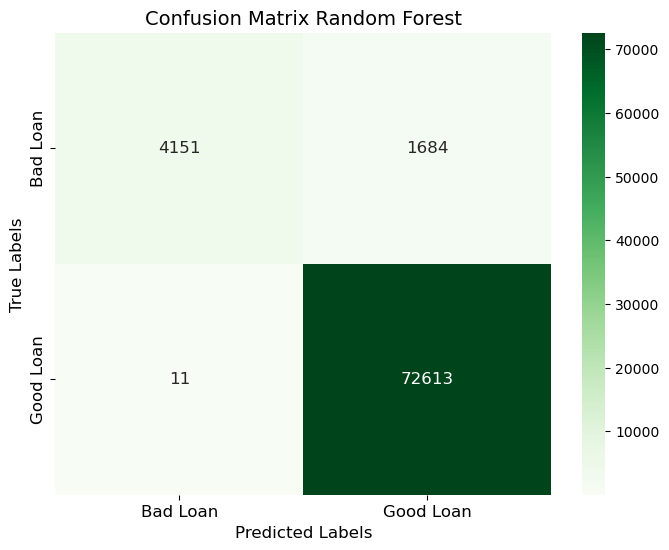

Accuracy (Test Set): 0.98
Precision (Test Set): 0.98
Recall (Test Set): 1.00
F1-Score (Test Set): 0.99
roc_auc (test-proba): 0.94
roc_auc (train-proba): 1.00


In [91]:
model_RF = Pipeline([
                   ('column_transformer', ct),
                   ('RF', RandomForestClassifier(random_state=42) )
                    ])
model_RF.fit(X_train, y_train)
plotting_confusion_matrix(model_RF, X_test, y_test, title='Random Forest')
eval_classification(model_RF)

### Decision Tree

In [92]:
from sklearn.tree import DecisionTreeClassifier

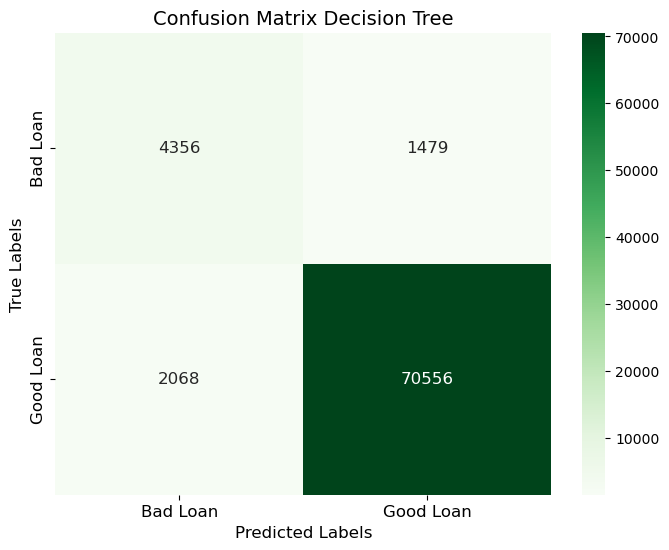

Accuracy (Test Set): 0.95
Precision (Test Set): 0.98
Recall (Test Set): 0.97
F1-Score (Test Set): 0.98
roc_auc (test-proba): 0.86
roc_auc (train-proba): 1.00


In [93]:
model_DT = Pipeline([
                   ('column_transformer', ct),
                   ('DT', DecisionTreeClassifier(random_state=42) )
                    ])
model_DT.fit(X_train, y_train)
plotting_confusion_matrix(model_DT, X_test, y_test, title='Decision Tree')
eval_classification(model_DT)

### Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression

c:\Users\derma\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


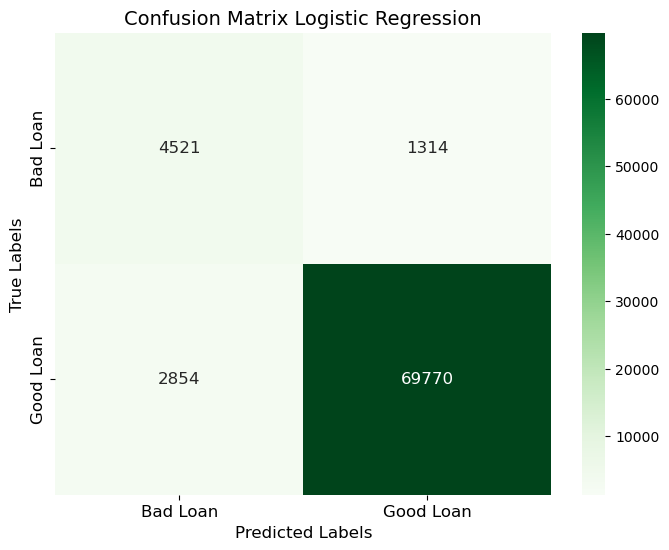

Accuracy (Test Set): 0.95
Precision (Test Set): 0.98
Recall (Test Set): 0.96
F1-Score (Test Set): 0.97
roc_auc (test-proba): 0.94
roc_auc (train-proba): 0.96


In [95]:
model_LR = Pipeline([
                   ('column_transformer', ct),
                   ('LR', LogisticRegression(random_state=42) )
                    ])
model_LR.fit(X_train, y_train)
plotting_confusion_matrix(model_LR, X_test, y_test, title='Logistic Regression')
eval_classification(model_LR)

### Ada Boost

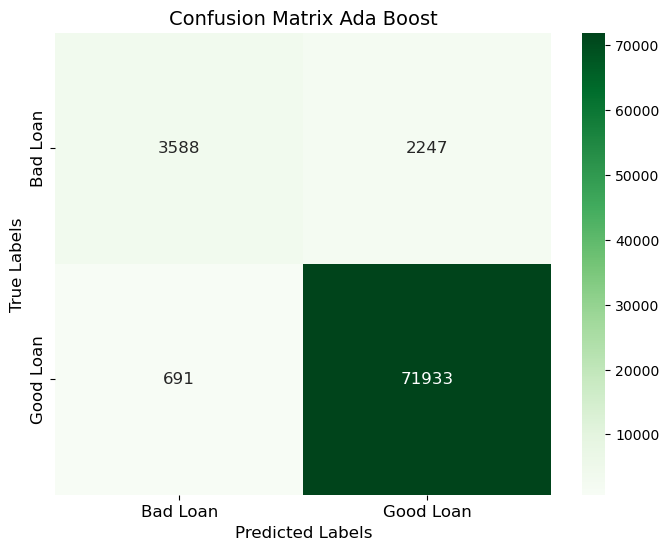

Accuracy (Test Set): 0.96
Precision (Test Set): 0.97
Recall (Test Set): 0.99
F1-Score (Test Set): 0.98
roc_auc (test-proba): 0.91
roc_auc (train-proba): 0.99


In [96]:
from sklearn.ensemble import AdaBoostClassifier

model_ADB = Pipeline([
                   ('column_transformer', ct),
                   ('ADB', AdaBoostClassifier(random_state=42) )
                    ])
model_ADB.fit(X_train, y_train)
plotting_confusion_matrix(model_ADB, X_test, y_test, title='Ada Boost')
eval_classification(model_ADB)

### XG Boost

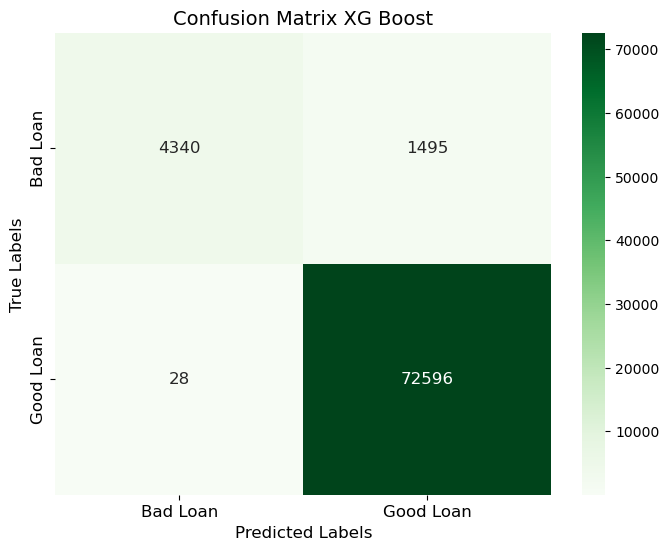

Accuracy (Test Set): 0.98
Precision (Test Set): 0.98
Recall (Test Set): 1.00
F1-Score (Test Set): 0.99
roc_auc (test-proba): 0.95
roc_auc (train-proba): 1.00


In [97]:
import xgboost as xgb

model_XGB = Pipeline([
                   ('column_transformer', ct),
                   ('XGB', xgb.XGBClassifier(random_state=42) )
                    ])
model_XGB.fit(X_train, y_train)
plotting_confusion_matrix(model_XGB, X_test, y_test, title='XG Boost')
eval_classification(model_XGB)

### Gradient Boost

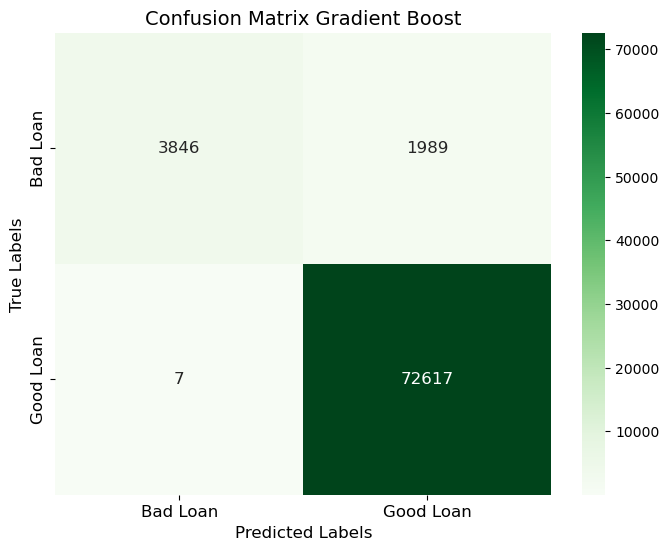

In [98]:
from sklearn.ensemble import GradientBoostingClassifier

model_GB = Pipeline([
                   ('column_transformer', ct),
                   ('GB', GradientBoostingClassifier(random_state=42) )
                    ])
model_GB.fit(X_train, y_train)
plotting_confusion_matrix(model_GB, X_test, y_test, title='Gradient Boost')


In [99]:
eval_classification(model_GB)

Accuracy (Test Set): 0.97
Precision (Test Set): 0.97
Recall (Test Set): 1.00
F1-Score (Test Set): 0.99
roc_auc (test-proba): 0.92
roc_auc (train-proba): 0.99


In [100]:
def eval(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    accuracy = round(accuracy_score(y_test, y_pred), 4)
    precision = round(precision_score(y_test, y_pred), 4)
    recall = round(recall_score(y_test, y_pred), 4)
    f1 = round(f1_score(y_test, y_pred), 4)
    auc_test = round(roc_auc_score(y_test, y_pred_proba[:, 1]), 4)
    auc_train = round(roc_auc_score(y_train, y_pred_proba_train[:, 1]), 4)   
    
    return accuracy, precision, recall, f1, auc_test, auc_train

def score_all_classification(model_list, X_train, y_train, X_test, y_test):
    model_name = ['Random Forest', 'Decision Tree', 'Logistic Regression', 'AdaBoost', 'XGBoost', 'Gradien Boosting']
    eval_cols = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC (Test)', 'AUC (Train)']
    
    eval_list = []
    for name, model in zip(model_name, model_list):
        result = eval(model, X_train, y_train, X_test, y_test)
        eval_list.append([name] + list(result))
    df_model = pd.DataFrame(data=eval_list, columns=eval_cols)
    
    return df_model


In [101]:
model_list_base = [model_RF, model_DT, model_LR, model_ADB, model_XGB, model_GB]

results = score_all_classification(model_list_base, X_train, y_train, X_test, y_test)
results

,Model,Accuracy,Precision,Recall,F1 Score,AUC (Test),AUC (Train)
0,Random Forest,0.9784,0.9773,0.9998,0.9885,0.9377,1.0000
1,Decision Tree,0.9548,0.9795,0.9715,0.9755,0.8590,1.0000
2,Logistic Regression,0.9469,0.9815,0.9607,0.9710,0.9393,0.9580
3,AdaBoost,0.9626,0.9697,0.9905,0.9800,0.9087,0.9889
4,XGBoost,0.9806,0.9798,0.9996,0.9896,0.9519,0.9986
5,Gradien Boosting,0.9746,0.9733,0.9999,0.9864,0.9238,0.9936


## Model Checking

In [102]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import mean_absolute_error

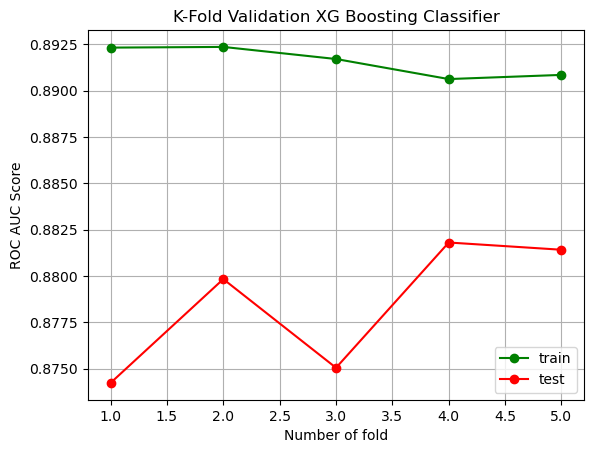

In [103]:
scores_train = []
scores_test = []


kf = KFold(shuffle=True,random_state=42, n_splits=5) #random_state equals to previous train_test_split
# shuffle=True

for train_index, test_index in kf.split(X):
  X_train = X.take(list(train_index),axis=0)
  X_test = X.take(list(test_index),axis=0)
  y_train, y_test = y.take(list(train_index),axis=0), y.take(list(test_index),axis=0)
  #Train the training data
  model_XGB.fit(X_train, y_train)
  # Predict training and testing
  y_train_pred = model_XGB.predict(X_train)
  y_pred = model_XGB.predict(X_test)
  # Evaluating training and testing
  score_train = roc_auc_score(y_train, y_train_pred)
  score_test = roc_auc_score(y_test, y_pred)
  scores_train.append(score_train)
  scores_test.append(score_test)

folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, scores_train, 'o-', color='green', label='train')
plt.plot(folds, scores_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('ROC AUC Score')
plt.title('K-Fold Validation XG Boosting Classifier')
plt.show()

In [104]:
feature_importance = pd.DataFrame()
feature_importance['features'] = X_train.columns
feature_importance['importance'] = model_XGB.named_steps['XGB'].feature_importances_

<Figure size 3000x1000 with 0 Axes>

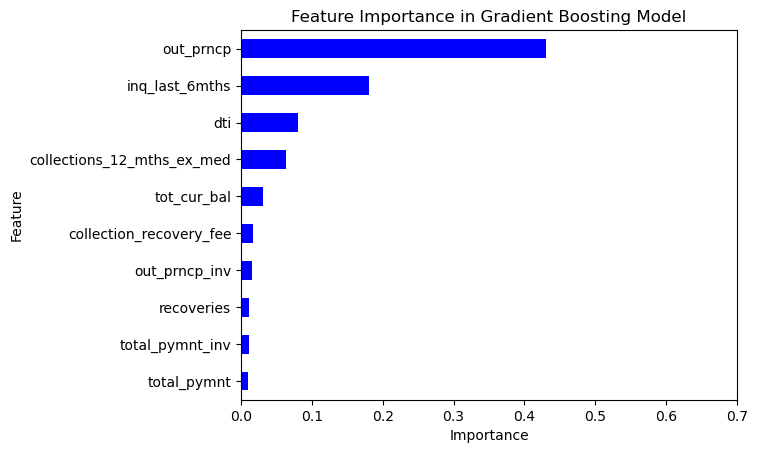

In [105]:
plt.figure(figsize=(30,10))
plot = feature_importance.sort_values('importance', ascending = False).head(10).plot.barh(color='blue',legend=None)
plot.set_yticklabels(feature_importance.sort_values('importance', ascending = False).head(10).features)
plt.title('Feature Importance in Gradient Boosting Model')
plt.xlim([0,0.7])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()